# BrainChart Data Formatting Guidelines

BrainChart allows users to compute percentile scores using an out-of-sample maximum likelihood estimation against the bootstrapped model parameters obtained from a large, aggregated neuroimaging dataset (see [Nature Article](https://www.nature.com/articles/s41586-022-04554-y)). No uploaded data is stored in the app. If you want your dataset to be included in the next iteration of the normative models and become a member of the BrainChart working group and consortium, please contact us at [BrainCharts@gmail.com](mailto:BrainCharts@gmail.com).

To use the app, download the included template and make sure your data is formatted in the same way. Adhere to the following guidance for each column:

### Column Guidelines:

- **Participant:** Unique participant identifier used in your study
- **Age:** Participants' age in years
- **age_days:** Participants' age in post-conception days, estimated as: `(years * 365.245) + 280`
- **Sex:** Binary factor identifying "Male" or "Female"
- **Study:** Name of your study (avoid using the same study name/acronym as in the app or paper)
- **fs_version:** FreeSurfer version used to obtain gross volumetric measures (use "NA" if not included in the template)
- **Country:** Optional country argument (leave as "NA" if not known)
- **Run:** Numeric encoding for scenarios with multiple measures within the same session (e.g., 1, 2, … n)
- **Session:** Numeric encoding for possibly multiple scanning sessions at different time-points (e.g., 1, 2, … n)
- **DX:** Diagnosis; use "CN" for controls (no specific classification system is used for clinical cohorts)
- **GMV:** Cortical grey matter volume (analogous to FreeSurfer's "Total cortical gray matter volume" label)
- **WMV:** Cerebral white matter volume (analogous to FreeSurfer's "Total cerebral white matter volume" label)
- **sGMV:** Subcortical grey matter volume (analogous to FreeSurfer's "Subcortical gray matter volume" label)
- **Ventricles:** Ventricular volume (analogous to FreeSurfer's "Volume of ventricles and choroid plexus" label)

### Additional Fields:
You can include any additional fields relevant to your study.

Parameter estimates and centile scores will be appended to the original upload. For clarity, centile scores are computed only for the selected brain feature. Repeat the process for each requested feature.


source : https://brainchart.shinyapps.io/brainchart/

In [2]:
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(zoo)
library(patchwork)
options(repr.plot.width = 18, repr.plot.height = 9)


In [16]:
source("100.common-variables.r")
source("101.common-functions.r")

source("300.variables.r")
source("301.functions.r")

#import the model 
#files are in https://github.com/brainchart/Lifespan

FIT_GMV <- readRDS("Share/FIT_GMV.rds")
FIT_WMV <- readRDS("Share/FIT_WMV.rds")
FIT_sGMV <- readRDS("Share/FIT_sGMV.rds")
FIT_Ventricles <- readRDS("Share/FIT_Ventricles.rds")

POP.CURVE.LIST <- list(AgeTransformed=seq(log(90),log(365*95),length.out=2^6),sex=c("Female","Male"))
POP.CURVE.RAW <- do.call( what=expand.grid, args=POP.CURVE.LIST )

CURVE_GMV <- Apply.Param(NEWData=POP.CURVE.RAW, FITParam=FIT_GMV$param )
CURVE_WMV <- Apply.Param(NEWData=POP.CURVE.RAW, FITParam=FIT_WMV$param )
CURVE_sGMV <- Apply.Param(NEWData=POP.CURVE.RAW, FITParam=FIT_sGMV$param )
CURVE_Ventricles <- Apply.Param(NEWData=POP.CURVE.RAW, FITParam=FIT_Ventricles$param )





#impoert subjects and filter them
qc <- read.csv("/QC_SC_RESULT.csv")
#formatted bethlehem input according to the first cell in the document
kinder <- read.csv("data/bethlehen_input.csv")
qc_filtered <- qc[qc$inclusion == "yes", ]
kinder <- kinder[kinder$participant %in% qc_filtered$subject, ]

#reformate kinder 
kinder$AgeTransformed <- log(kinder$age_days)
kinder$GMVTransformed <- kinder$GMV/10000
kinder$WMVTransformed <- kinder$WMV/10000
kinder$sGMVTransformed <- kinder$sGMV/10000
kinder$VentriclesTransformed <- kinder$Ventricles/10000
kinder<-kinder[, c("AgeTransformed", "GMVTransformed","WMVTransformed", "sGMVTransformed","VentriclesTransformed","sex")]



Warning message in eval(ei, envir):
“Have set a fixed random seed, all runs will be identical unless this is changed (may be good or bad, depending on what you want)”
Warning message in model.matrix.default(Model.Formula, Model.Frame, contrasts.arg = FITParam$contrasts, :
“Variable 'fs_version' fehlt, ihre Kontraste werden ignoriert”
Warning message in model.matrix.default(Model.Formula, Model.Frame, contrasts.arg = FITParam$contrasts, :
“Variable 'fs_version' fehlt, ihre Kontraste werden ignoriert”
Warning message in model.matrix.default(Model.Formula, Model.Frame, contrasts.arg = FITParam$contrasts, :
“Variable 'fs_version' fehlt, ihre Kontraste werden ignoriert”
Warning message in model.matrix.default(Model.Formula, Model.Frame, contrasts.arg = FITParam$contrasts, :
“Variable 'fs_version' fehlt, ihre Kontraste werden ignoriert”


In [18]:
head(kinder)
toOriginal <- function(Z) {
  exp(Z)/365
}


,AgeTransformed,GMVTransformed,WMVTransformed,sGMVTransformed,VentriclesTransformed,sex
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,8.740618,48.20263,41.06130,5.3422,1.0607,Female
2,7.626297,56.10733,34.68684,5.2033,0.6172,Male
3,8.731816,54.67991,47.79243,6.4285,2.4487,Male
4,8.634066,57.83332,45.90994,6.3591,1.1805,Female
5,8.530773,58.27188,43.02828,6.0295,0.7342,Male
6,8.456757,57.68544,39.89857,6.0065,0.8877,Female


Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 34 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 32 rows containing missing values (`ge

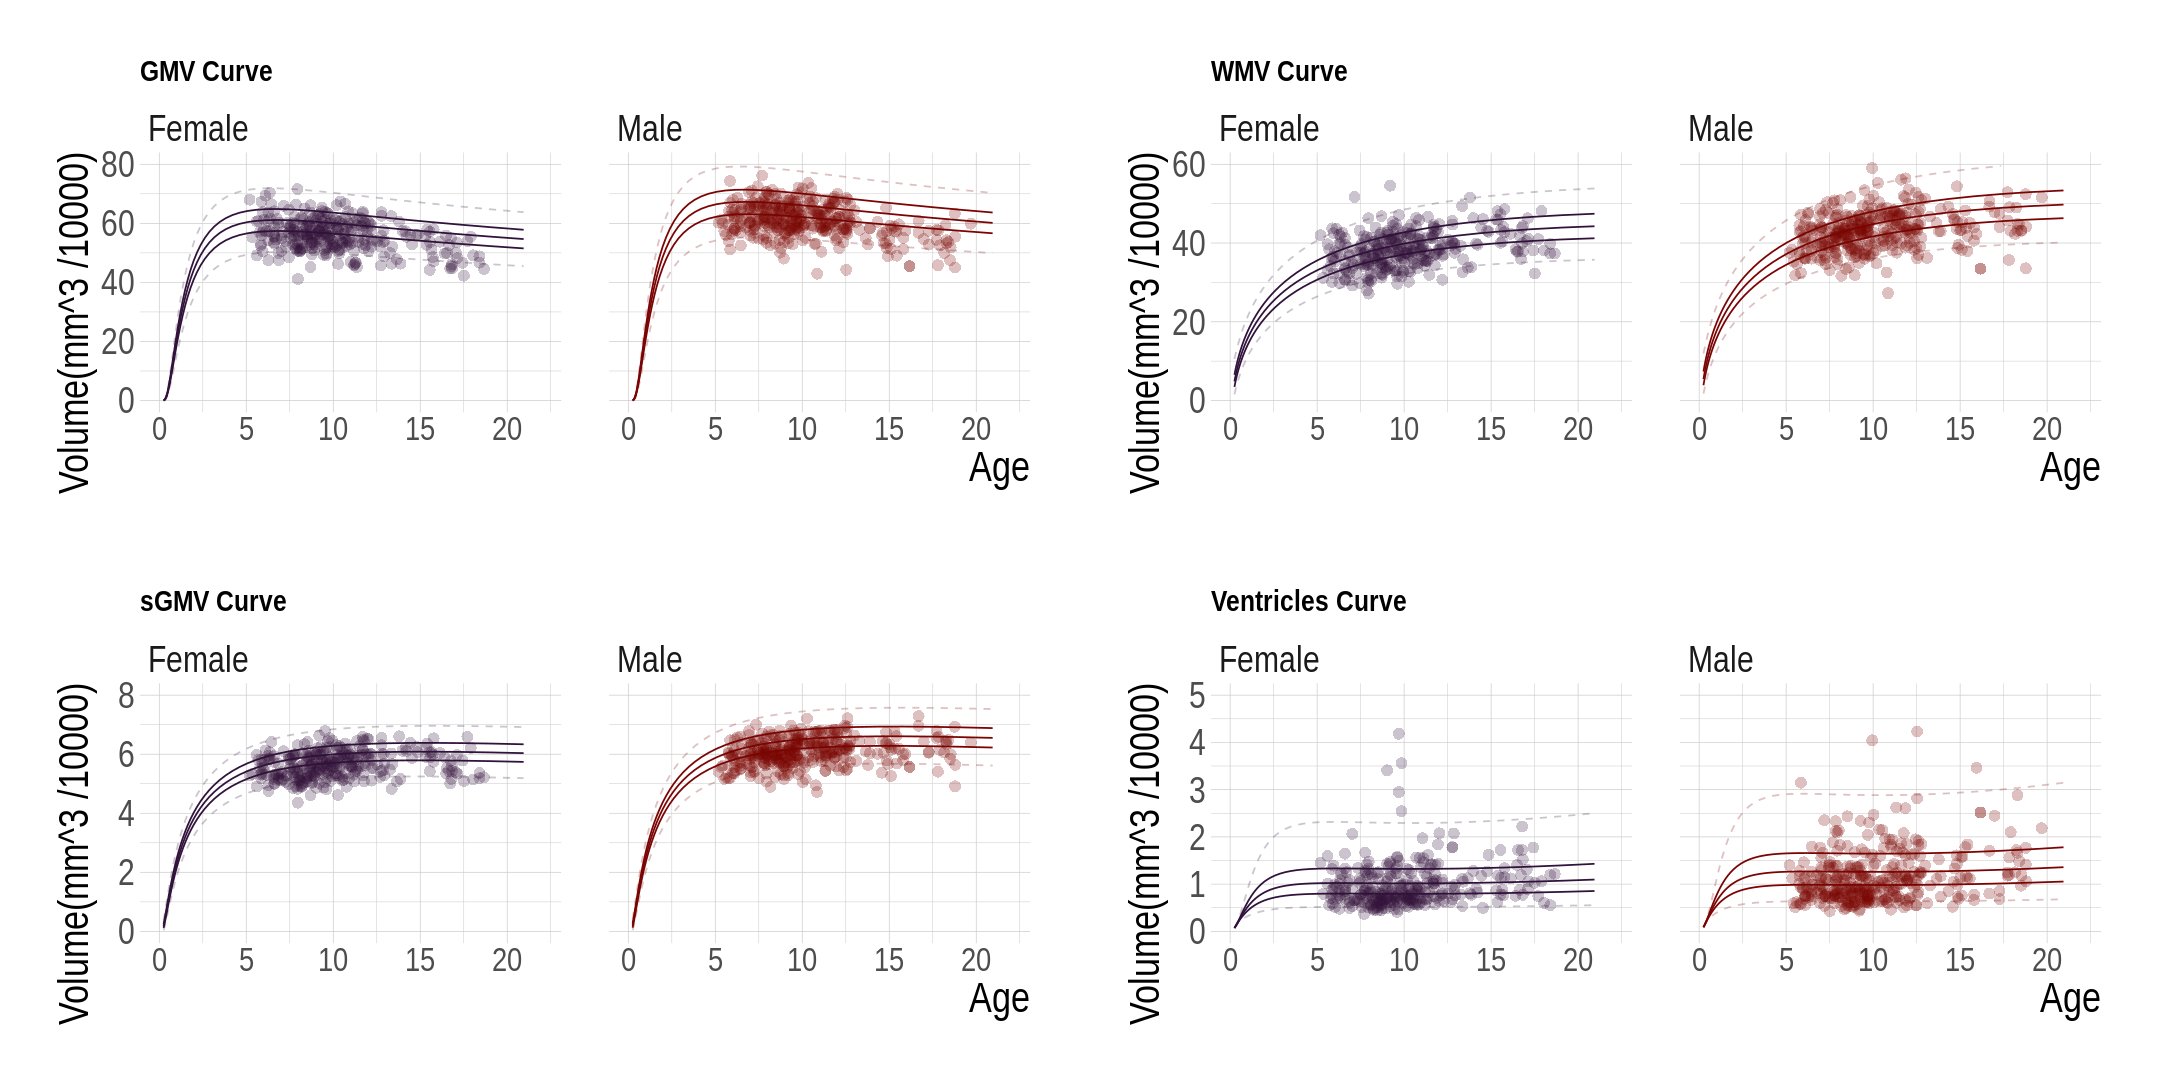

In [22]:
# Set common parameters
x <- 22
common_point_size <- 3
common_opacity <- 0.25

# Function to create a volume plot
create_volume_plot <- function(data, y_var, y_limit, title) {
  ggplot(data, aes(x = toOriginal(AgeTransformed), y = PRED.m500.pop, color = sex)) +
    geom_line(aes(y = PRED.u750.pop)) +
    geom_line(aes(y = PRED.l250.pop)) +
    geom_line() +
    geom_line(aes(y = PRED.u975.pop), linetype = "dashed", alpha = common_opacity) +
    geom_line(aes(y = PRED.l025.pop), linetype = "dashed", alpha = common_opacity) +

    
    geom_point(data = kinder, aes(x = toOriginal(AgeTransformed), y = !!sym(y_var)), pch = 16, alpha = common_opacity, size = common_point_size) +
    ylim(0, y_limit) +
    xlim(0, x) +
    facet_grid(. ~ sex) +
    ggtitle(title) +
    labs(x = "Age", y = "Volume(mm^3 /10000)")+
    theme_ipsum()+
scale_color_viridis_d(option='turbo')+
    theme(axis.title.x=element_text(size=25),
     axis.title.y=element_text(size=25),
     strip.text = element_text(size = 22),
     axis.text.x = element_text(size=20),#, angle=90,hjust=0.95,vjust=0.2),
     axis.text.y = element_text(size=22),
    legend.title = element_text(size=22),
    legend.text = element_text(size=22),
    legend.position='none'
     )
}

# Plot for GMV Curve
plot_gmv <- create_volume_plot(CURVE_GMV, "GMVTransformed", 80, "GMV Curve")

# Plot for WMV Curve
plot_wmv <- create_volume_plot(CURVE_WMV, "WMVTransformed", 60, "WMV Curve")

# Plot for sGMV Curve
plot_sgmv <- create_volume_plot(CURVE_sGMV, "sGMVTransformed", 8, "sGMV Curve")

# Plot for Ventricles Curve
plot_ventricles <- create_volume_plot(CURVE_Ventricles, "VentriclesTransformed", 5, "Ventricles Curve")

# Combine plots into one grid
combined_plot <- plot_gmv + plot_wmv + plot_sgmv + plot_ventricles

# Display the combined plot
print(combined_plot)


In [14]:
#ggsave("/home/ibrazug/Dokumente/KindersegV2/Graphs/plot.png", plot = last_plot(), width = 18, height = 9, dpi = 300)